# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Liability Friendly Equity Portfolios

- design equity portfolios with better liability hedging benefits
- hedging liabilities with some kind of a cash flow matching perspective
- stocks that may have a low tracking error with respect to the liabilities
- portfolio of high dividend yield stocks, low vol stocks
- low vol stocks (tracking error with liabilities) could be the closest approximation to bonds that we can find in the equity universe
- increase the allocation to this more collaborative finally equity portfolio
- selecting stocks with the both average liability hedging benefits will always allow investors to allocate more to equity for the same risk budget. And this should translate into superior performance as long as the impact in terms of performance of these multimedia friendly portfolio is not too bad.

## Dynamic Risk Budgeting

In [1]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# %load_ext autoreload
# autoreload 2

### Generating returns for bond and stock assets

In [2]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0=0.03, sigma=0.02)
price_eq = erk.gbm(n_years=10, n_scenarios=n_scenarios, mu=0.07, sigma=0.15)

## Portfolio Returns Generation with Fixed Mix Allocator

In [3]:
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna() ## Proxy duration matched portfolio
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=0.7)
pd.concat([erk.terminal_stats(rets_zc, name='ZC', floor=0.75),
           erk.terminal_stats(rets_eq, name='Eq', floor=0.75),
           erk.terminal_stats(rets_7030b, name='70/30', floor=0.75)],
          axis=1).round(2)

,ZC,Eq,70/30
mean,1.34,1.96,1.75
std,0.00,0.97,0.59
p_breach,NaN,0.04,0.01
e_short,NaN,0.12,0.07
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


## Portfolio Returns Generation with Floor Allocator
- Note the trade off some upside in the 100% equity portfolio in exchange for cutting off your downside
- Floor allocator performs better than fixed weight allocator

In [6]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices=zc_prices[1:])
pd.concat([erk.terminal_stats(rets_zc, name='ZC', floor=0.75),
           erk.terminal_stats(rets_eq, name='Eq', floor=0.75),
           erk.terminal_stats(rets_7030b, name='70/30', floor=0.75),
           erk.terminal_stats(rets_floor75, name='Floor75', floor=0.75)
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75
mean,1.34,1.96,1.75,1.93
std,0.00,0.97,0.59,0.97
p_breach,NaN,0.04,0.01,NaN
e_short,NaN,0.12,0.07,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


### Portfolio risk and performance with Floor Allocator with difference multiplier
- for m=5, the mean return is almost something close to equities
- there is some breached going on when m is equal to 5, with monthly rebalancing
- but it does not happen very often, and when it does happen, the shortfall is pretty tiny

In [9]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices=zc_prices[1:], m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=0.75, zc_prices=zc_prices[1:], m=5)
pd.concat([erk.terminal_stats(rets_zc, name='ZC', floor=0.75),
           erk.terminal_stats(rets_eq, name='Eq', floor=0.75),
           erk.terminal_stats(rets_7030b, name='70/30', floor=0.75),
           erk.terminal_stats(rets_floor75, name='Floor75', floor=0.75),
           erk.terminal_stats(rets_floor75m1, name='Floor75m1', floor=0.75),
           erk.terminal_stats(rets_floor75m5, name='Floor75m5', floor=0.75),
          ],
          axis=1).round(4)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5
mean,1.3433,1.9560,1.7486,1.9330,1.6158,1.9420
std,0.0000,0.9669,0.5900,0.9718,0.4267,0.9748
p_breach,NaN,0.0390,0.0098,NaN,NaN,NaN
e_short,NaN,0.1213,0.0688,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


## Risk Budgeting with Drawdown Constraints
- Using portfolio of stocks and cash given that in this scenario there is no distant liability
- Not wanting to have a drawdown exceeded at any given point in time is a very short-term liability

In [16]:
cashrate = 0.02
monthly_cashreturn = (1+cashrate)**(1/12)-1

rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_eq.index, columns=rets_eq.columns)
rets_cash.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,...,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652
2,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,...,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652
3,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,...,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652
4,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,...,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652
5,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,...,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652,0.001652


In [11]:
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator, maxdd=.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

pd.concat([erk.terminal_stats(rets_zc, name='ZC', floor=0.75),
           erk.terminal_stats(rets_eq, name='Eq', floor=0.75),
           erk.terminal_stats(rets_7030b, name='70/30', floor=0.75),
           erk.terminal_stats(rets_floor75, name='Floor75', floor=0.75),
           erk.terminal_stats(rets_floor75m1, name='Floor75m1', floor=0.75),
           erk.terminal_stats(rets_floor75m5, name='Floor75m5', floor=0.75),
           erk.terminal_stats(rets_maxdd25, name='MaxDD25', floor=0.75),
          ],
          axis=1).round(4)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,MaxDD25
mean,1.3433,1.9560,1.7486,1.9330,1.6158,1.9420,1.6211
std,0.0000,0.9669,0.5900,0.9718,0.4267,0.9748,0.5354
p_breach,NaN,0.0390,0.0098,NaN,NaN,NaN,NaN
e_short,NaN,0.1213,0.0688,NaN,NaN,NaN,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
erk.summary_stats(rets_maxdd25)['Max Drawdown'].head()

0   -0.126550
1   -0.197736
2   -0.137006
3   -0.164497
4   -0.132603
Name: Max Drawdown, dtype: float64

In [13]:
erk.summary_stats(rets_maxdd25)['Max Drawdown'].min()

-0.2347653638298039

## Distribution of Portfolio Terminal Values
- note how the various strategies are shaping the outcomes
- how these strategies operate is to shift or shape, move the shape of the distribution towards something that is more acceptable
- giving up some of the upside in exchange for eliminating some large part of the downside that you simply do not find acceptable.

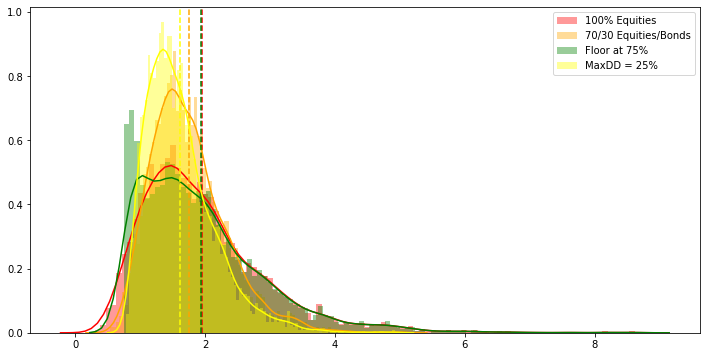

In [14]:
import seaborn as sns

tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

# Plot
plt.figure(figsize=(12,6))
sns.distplot(tv_eq, color = "red", label="100% Equities", bins=100)
plt.axvline(tv_eq.mean(), ls="--", color="red")
sns.distplot(tv_7030b, color = "orange", label="70/30 Equities/Bonds", bins=100)
plt.axvline(tv_7030b.mean(), ls="--", color="orange")
sns.distplot(tv_floor75, color = "green", label="Floor at 75%", bins=100)
plt.axvline(tv_floor75.mean(), ls="--", color="green")
sns.distplot(tv_maxdd25, color = "yellow", label="MaxDD = 25%", bins=100)
plt.axvline(tv_maxdd25.mean(), ls="--", color="yellow")
plt.legend();

## Drawdown constraint with Historical Data
- One historical scenario vs generated scenarios previously
- Note the lower return for the drawdown allocator portfolio vs the market index but compensated by the much lower maximum drawdown

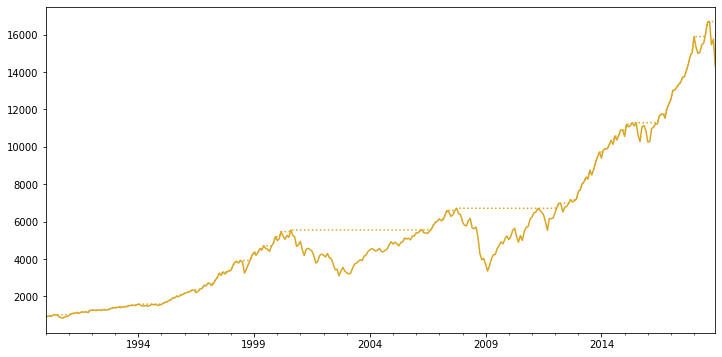

In [25]:
rets_tmi = erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod')
dd_tmi['Previous Peak'].plot(ax=ax, ls=':', color='goldenrod')
plt.show()

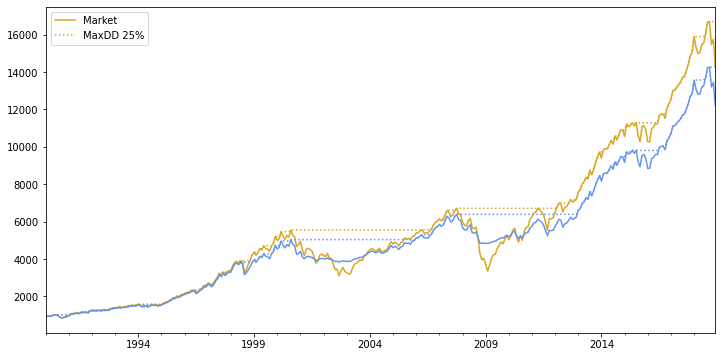

In [26]:
cashrate = 0.03
monthly_cashreturn = (1+cashrate)**(1/12)-1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_tmi.index, columns=[0])

rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash, allocator=erk.drawdown_allocator, maxdd=.25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])

ax = dd_tmi['Wealth'].plot(figsize=(12,6), ls="-", color='goldenrod', label='Market', legend=True)
dd_tmi['Previous Peak'].plot(ax=ax, ls=":", color="goldenrod")
dd_25['Wealth'].plot(ax=ax, label="MaxDD 25%", color='cornflowerblue', legend=True)
dd_25['Previous Peak'].plot(ax=ax, ls=':', color='cornflowerblue')
plt.show()

In [27]:
erk.summary_stats(pd.concat([rets_tmi.rename("Market"), rets_maxdd25[0].rename("MaxDD")], axis=1))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Market,0.096058,0.145419,-0.668827,4.247282,0.066949,0.094633,0.441951,-0.499943
MaxDD,0.090062,0.112755,-0.630463,5.015334,0.049978,0.071074,0.518327,-0.244212
